# House Sale Price Prediction
## Problem Explanation

Surprise Housing, a US-based real estate company, plans to enter the Australian housing market. To make profitable investment decisions, the company wants to predict the true market value of houses using historical housing data.

## Business Objective

The primary business objective is to:

    1. Predict the actual price of houses accurately using historical data
    2. Identify key variables that drive housing prices in the Australian market
    3. Help management:
        > Buy houses below intrinsic value
        > Focus on features that yield maximum return on investment
        > Understand pricing dynamics in a new market
        > The model will support data-driven investment decisions and strategic planning.

## Approach

The solution aims to:

    1. Build a multiple linear regression model with regularization
    2. Apply Ridge Regression to handle multicollinearity
    3. Lasso Regression to perform feature selection
    4. Determine:
        > Significant predictors of house prices
        > Optimal lambda values using cross-validation
    5. Compare Ridge and Lasso models based on:
        > R² score
        > RMSE
        > Model interpretability

### Sections of assignment
#### - Section 1:Exploratory Correlation Analysis
    - Section 1.1 : Exploratory Correlation Analysis

#### - Section 2 : Missing Value Treatment
    - Section 2.1 - Handling Missing Values with Meaningful Nulls
    - Section 2.2 - Handling Missing Values Where Data Is Not Recorded
 
#### - Section 3: Target Variable Transformation

#### - Section 4: Categorical Variables Transformation

#### - Section 5: Model Building
    - Section 5.1 : Data preparation for model training and testing
    - Section 5.2 : Data Scaling
    - Section 5.3 : Create a model with training data

#### - Section 6: Regularization
    - Section 6.1:  Ridge Regression
    - Section 6.2: Lasso Regression

#### - Section 7: Feature Selection
    - Section 7.1: Feature selection with Ridge Regression
    - Section 7.2: Feature selection with Lasso Regression
  


# Section 1:  Data understanding and Data Exploration

In [326]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso



In [327]:
#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [328]:
#Read the dataset
data = pd.read_csv("train.csv", na_values="NAN")
house = data.copy(deep=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [329]:
data.shape

(1460, 81)

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [331]:
# lets try to check the data
pd.set_option('display.max_columns', None)
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Lets plot a distribution plot on the output value which is - SalePrice to understand Skewness and Kurtosis

<Axes: xlabel='SalePrice', ylabel='Density'>

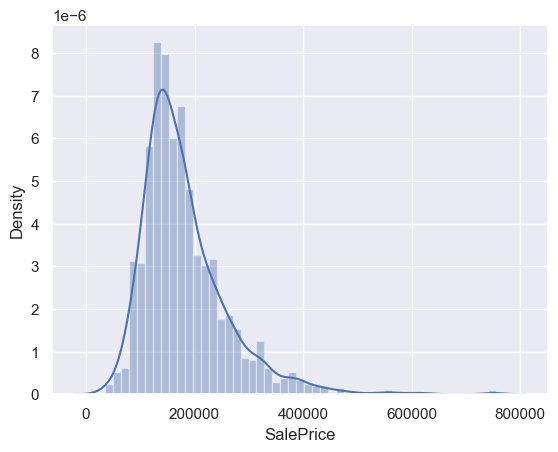

In [332]:
sns.distplot(data['SalePrice'])

#### Analysis of above graph
 1. The distribution of SalePrice is right-skewed, indicating non-normality.
 2. Most houses are concentrated in the lower to mid-price range.
 3. A small number of high-priced properties create a long right tail.
 4. Presence of outliers is evident at higher price values.
 5. A log transformation of SalePrice may help stabilize variance and improve model performance.

In [333]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Analysis of values - data is not normally distributed.
##### Skewness = 1.88 Indicates the distribution is positively (right) skewed. Most house prices are on the lower side, with a few very high-priced houses stretching the right tail.

##### Kurtosis = 6.54 The distribution has a sharper peak and heavier tails than a normal distribution. Suggests the presence of extreme values (outliers) in house prices.

## Section 1.1 - Exploratory Correlation Analysis
##### Let’s build a correlation matrix to identify which variables have the strongest relationship with the target variable (SalePrice).

<Axes: >

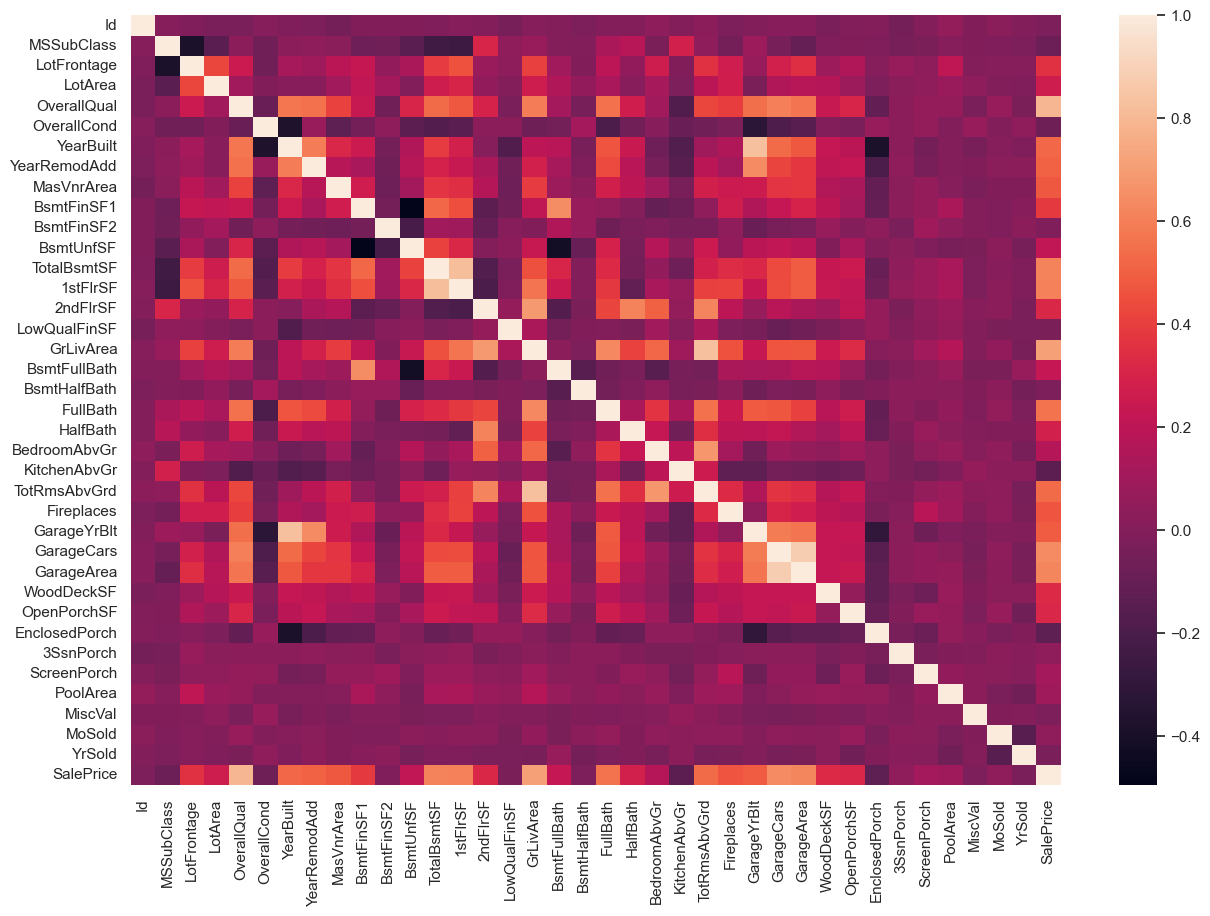

In [334]:
data_cor = data.select_dtypes(include = 'number').corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(data_cor)

#### Lets identify the top 10 variables that have the larget correlation

In [335]:
top10_corr = data_cor['SalePrice'].sort_values(ascending=False)[0:10]
top10_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [336]:
top10_cols = top10_corr.index.tolist()
top10_cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

### Section 1.11 Visual Exploration

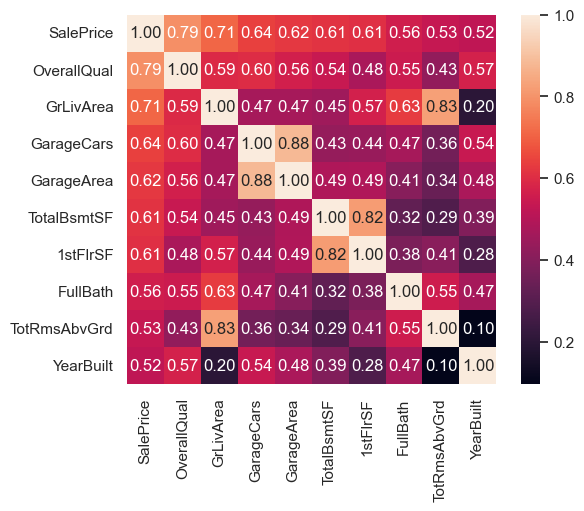

In [337]:
cm = data[top10_cols].corr()
sns.heatmap(cm, annot=True, fmt='.2f', square=True)
plt.show()

### Correlation-heatmap-analysis
Values range from 0 to 1, where:
- Closer to 1 means strong positive correlation
- Closer to 0 means weak or no correlation
  
#### **Features Most Strongly Correlated with SalePrice**
- OverallQual (0.79)-  Strongest correlation. Higher overall quality → higher sale price
- GrLivArea (0.71) - Larger living area significantly increases price
- GarageCars (0.64) and GarageArea (0.62) - Bigger garages and more parking increase value
- TotalBsmtSF (0.61) and 1stFlrSF (0.61)
- Larger basement and first floor areas add value

#### **Moderate Correlation with SalePrice**
- FullBath (0.56)
- TotRmsAbvGrd (0.53)
- YearBuilt (0.52)
These still contribute meaningfully but less strongly than size and quality features.

#### **Weak Correlations**
These relationships are weak and may add limited explanatory power.
- YearBuilt & TotRmsAbvGrd (0.10)
- GrLivArea & YearBuilt (0.20)

#### **Strong Correlation Between Independent Features (Multicollinearity)**
Several predictors are highly correlated with each other, which can cause instability in linear regression:
- GarageCars & GarageArea (0.88) - redundant information
- TotalBsmtSF & 1stFlrSF (0.82) - Larger basements usually mean larger first floors
- GrLivArea & TotRmsAbvGrd (0.83) - More rooms generally imply larger living area

##### **This indicates multicollinearity, which affects coefficient reliability.**

### Let’s use a scatter pair plot to visualize the relationship between the most important predictors and the house sale price.

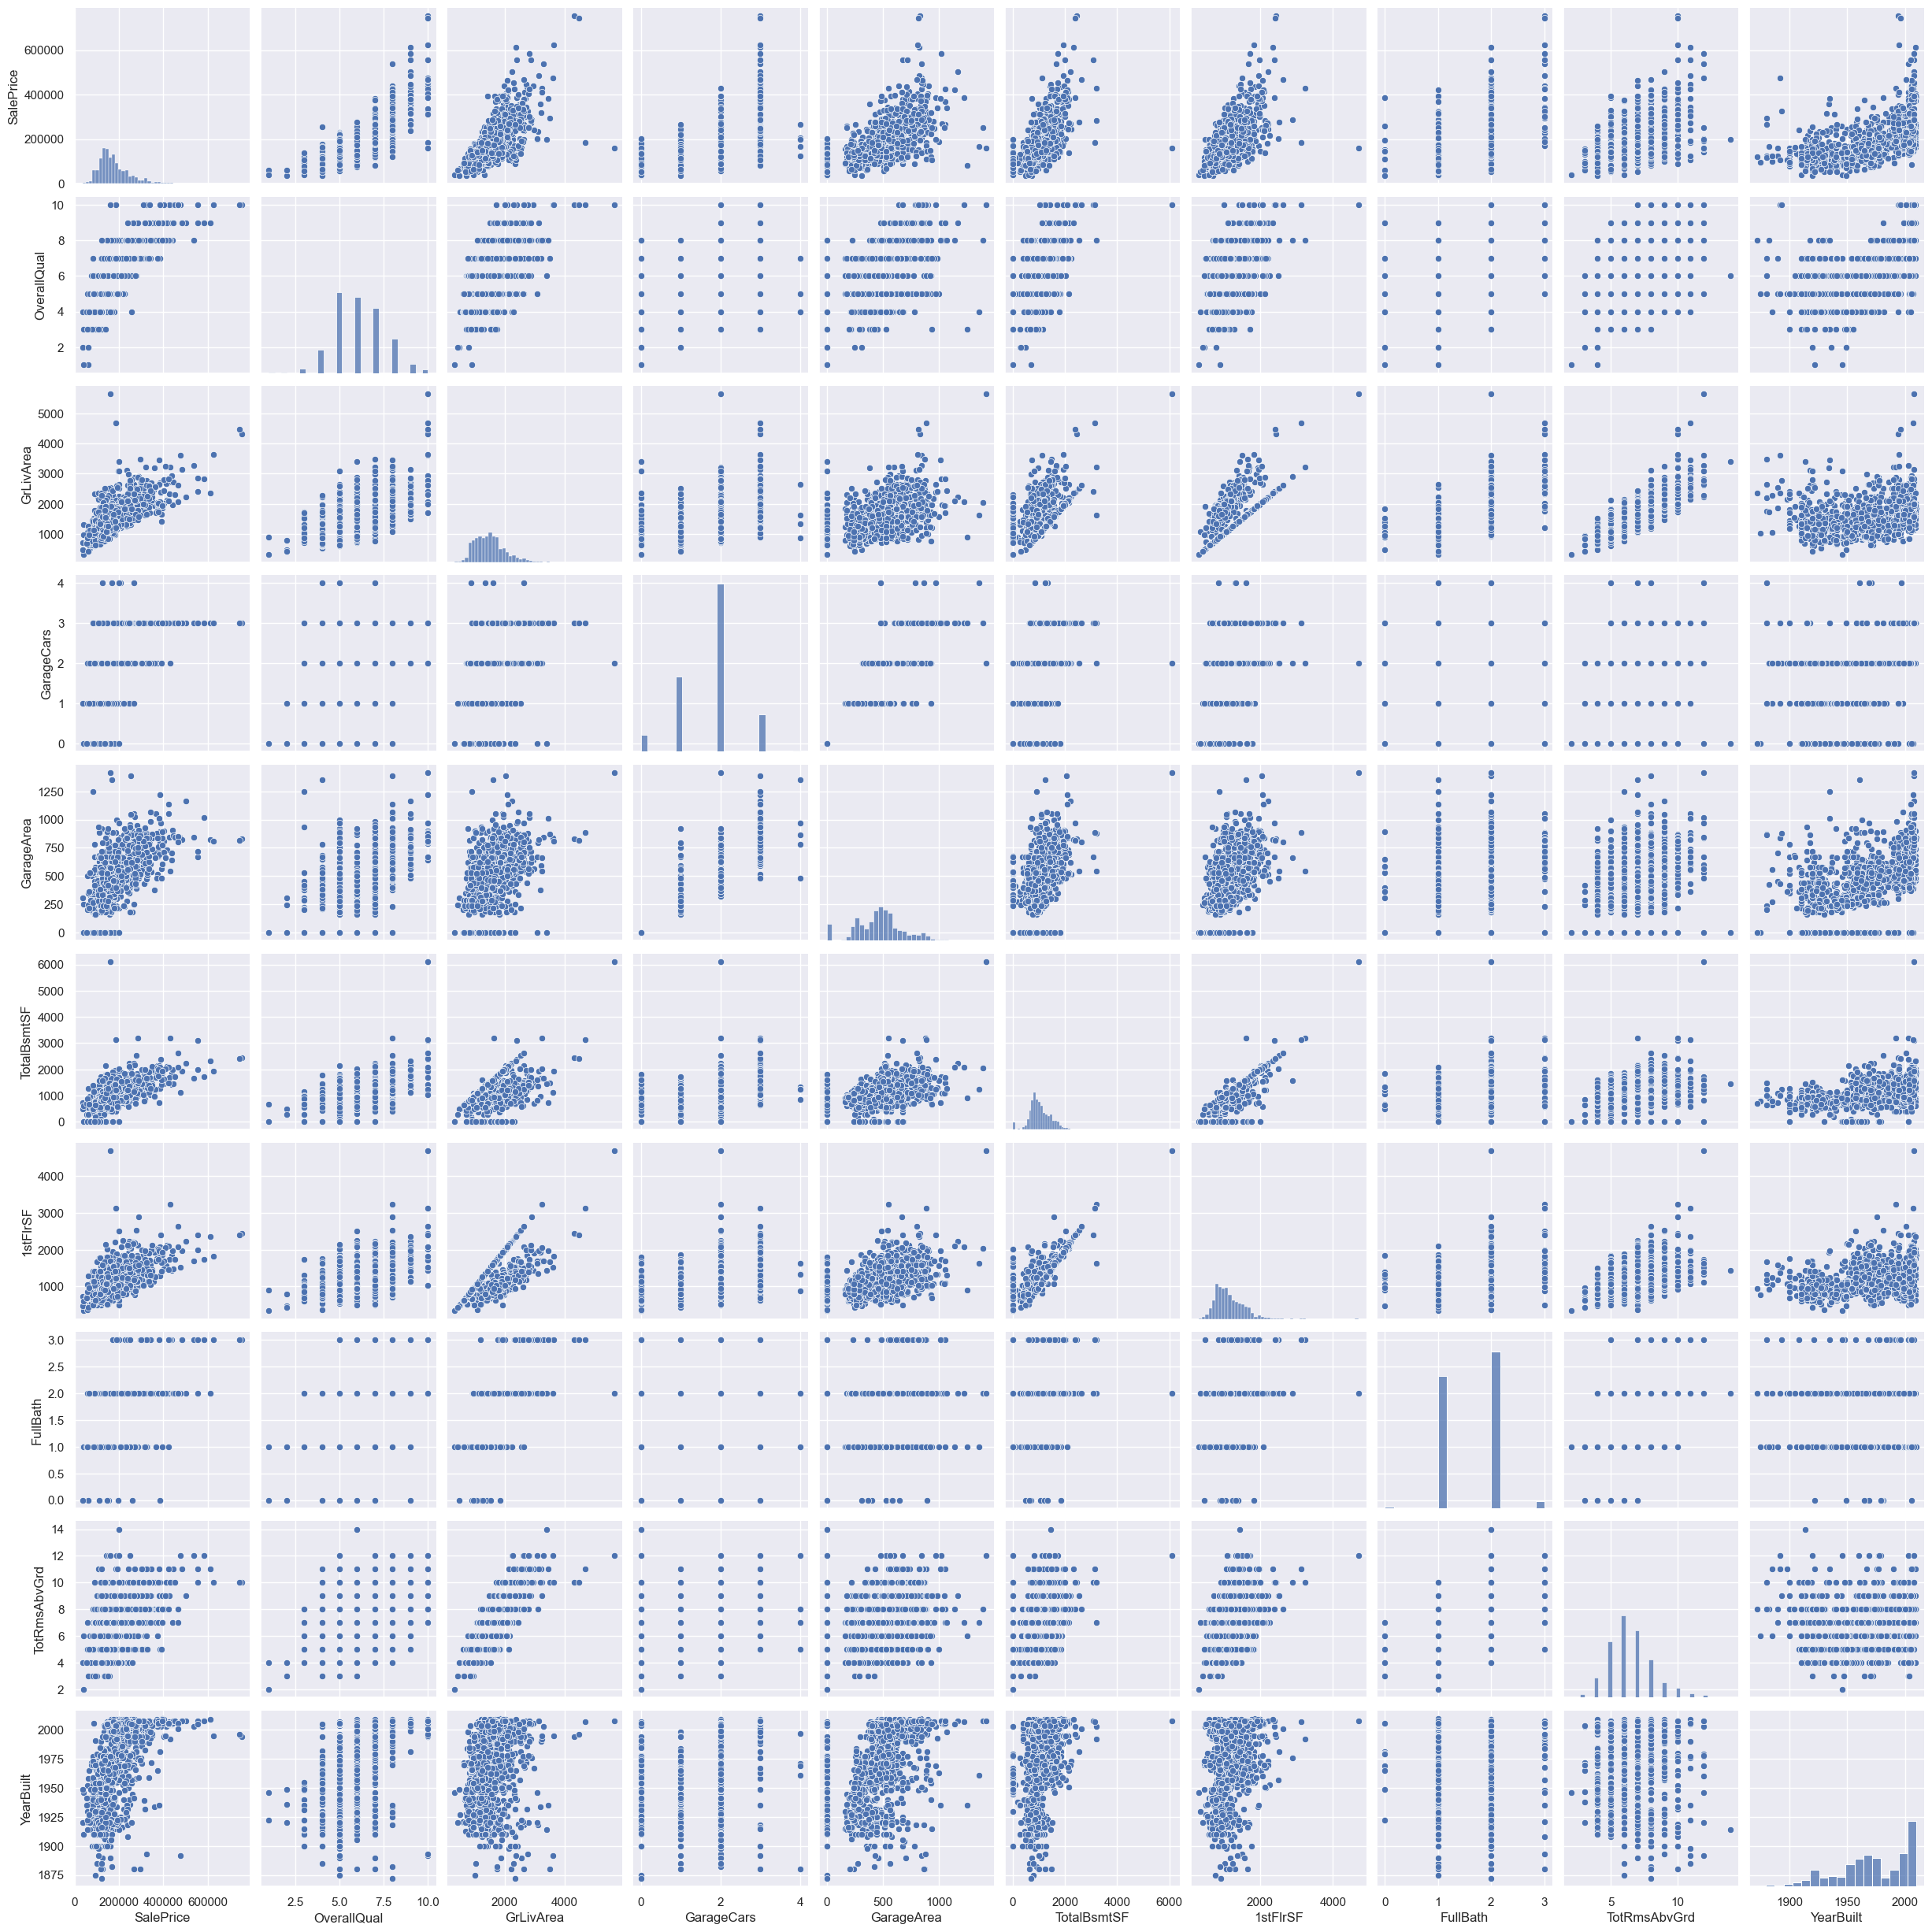

In [338]:
sns.set()
sns.pairplot(data[top10_cols], size = 2.5)
plt.show();

### Analysis: 
    1. SalePrice shows a strong positive relationship with OverallQual, GrLivArea, TotalBsmtSF, and GarageArea, indicating these are key price drivers.
    2. The relationship between SalePrice and most predictors appears largely linear, supporting the use of linear regression models.
    3. Some variables such as GarageCars and FullBath show step-wise patterns, as they are discrete counts.
    4. A few outliers are visible, especially for larger living areas and higher prices, which may influence model performance.

Overall, the selected variables demonstrate good explanatory power for predicting house prices

#### Plot each variable to understand outliers and relationship

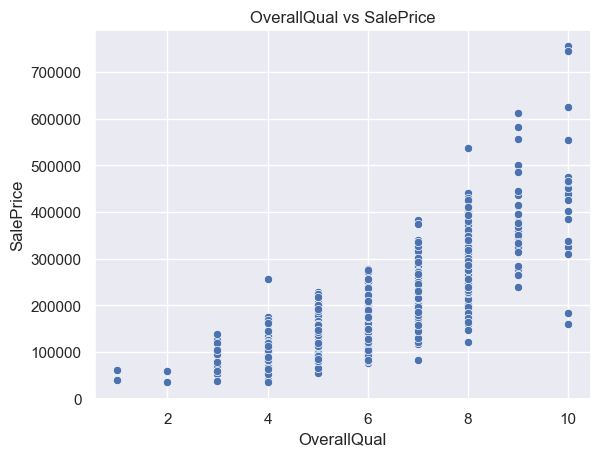

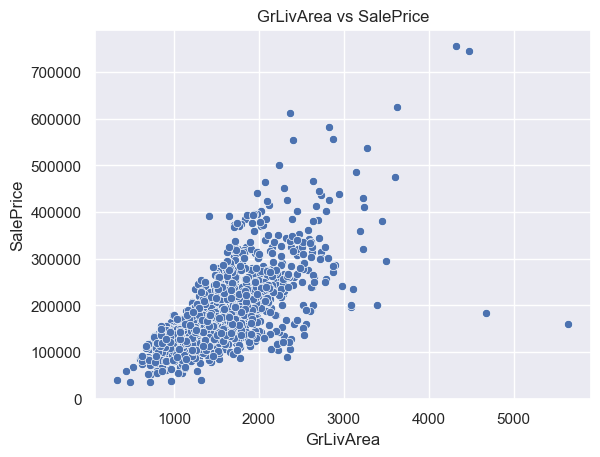

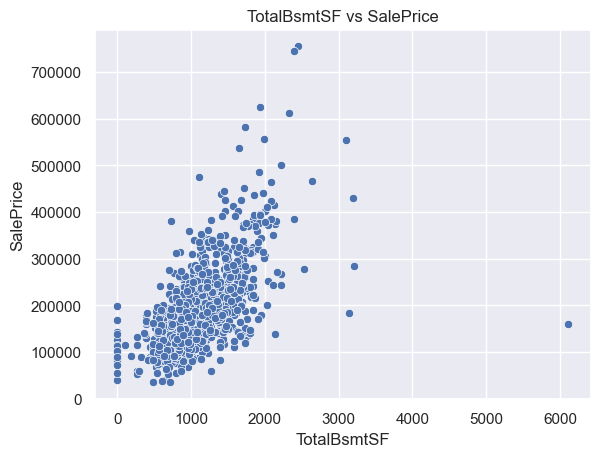

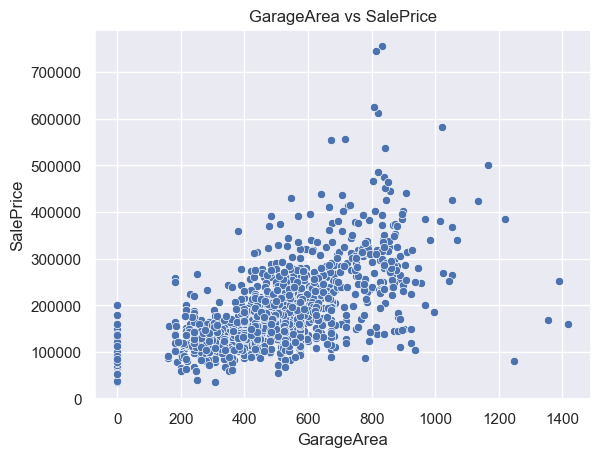

In [339]:
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

for col in features:
    sns.scatterplot(x=data[col], y=data['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

##### Analysis : 
1. **OverallQual vs SalePrice**:  Higher overall quality ratings are strongly associated with higher house prices, showing a clear positive trend.
2. **GrLivArea vs SalePrice**: Sale price increases steadily with above-ground living area, indicating a strong linear relationship.
3. **TotalBsmtSF vs SalePrice**: Houses with larger basement areas tend to have higher sale prices, with a moderately strong positive correlation.
4. **GarageArea vs SalePrice**: Larger garage areas generally correspond to higher sale prices, though with more variability compared to other features.

In [340]:
data[top10_cols].describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808
std,79442.502883,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000
25%,129975.000000,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000
50%,163000.000000,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000
75%,214000.000000,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000


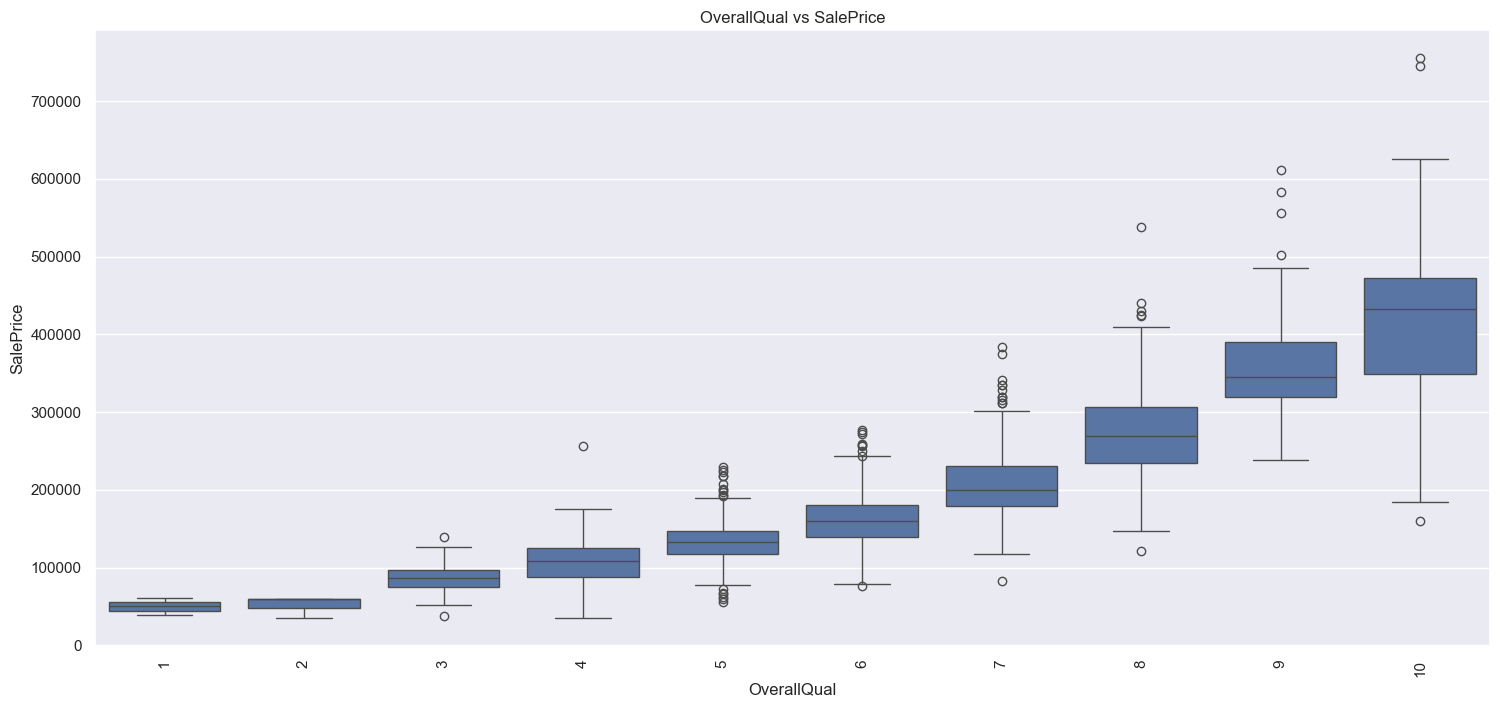

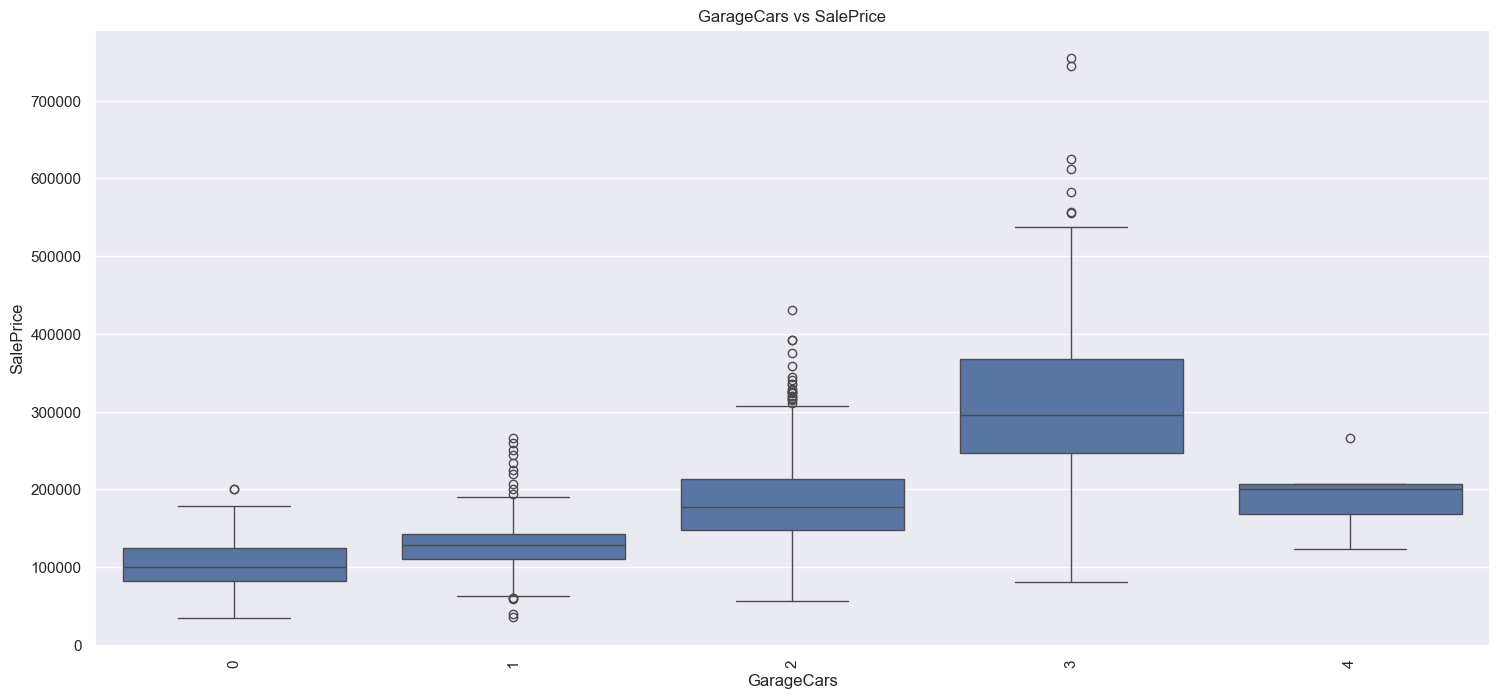

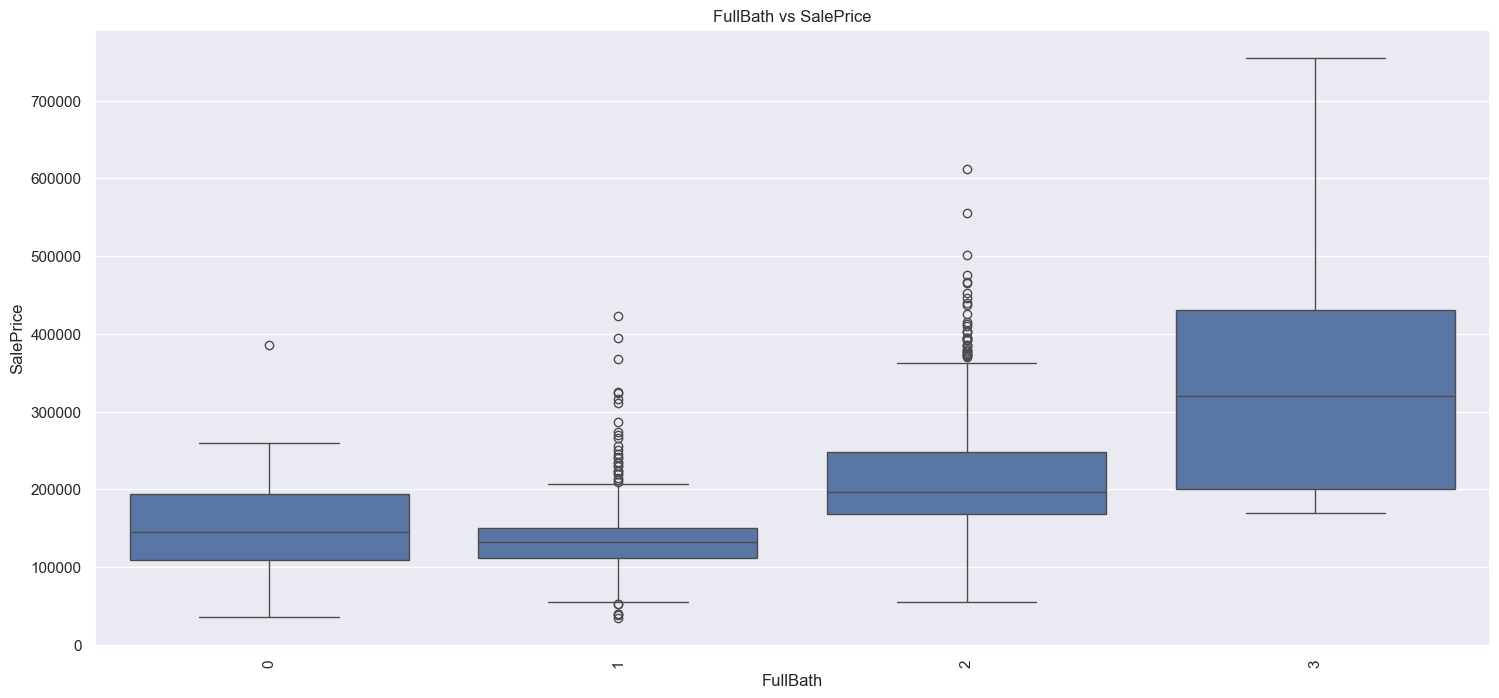

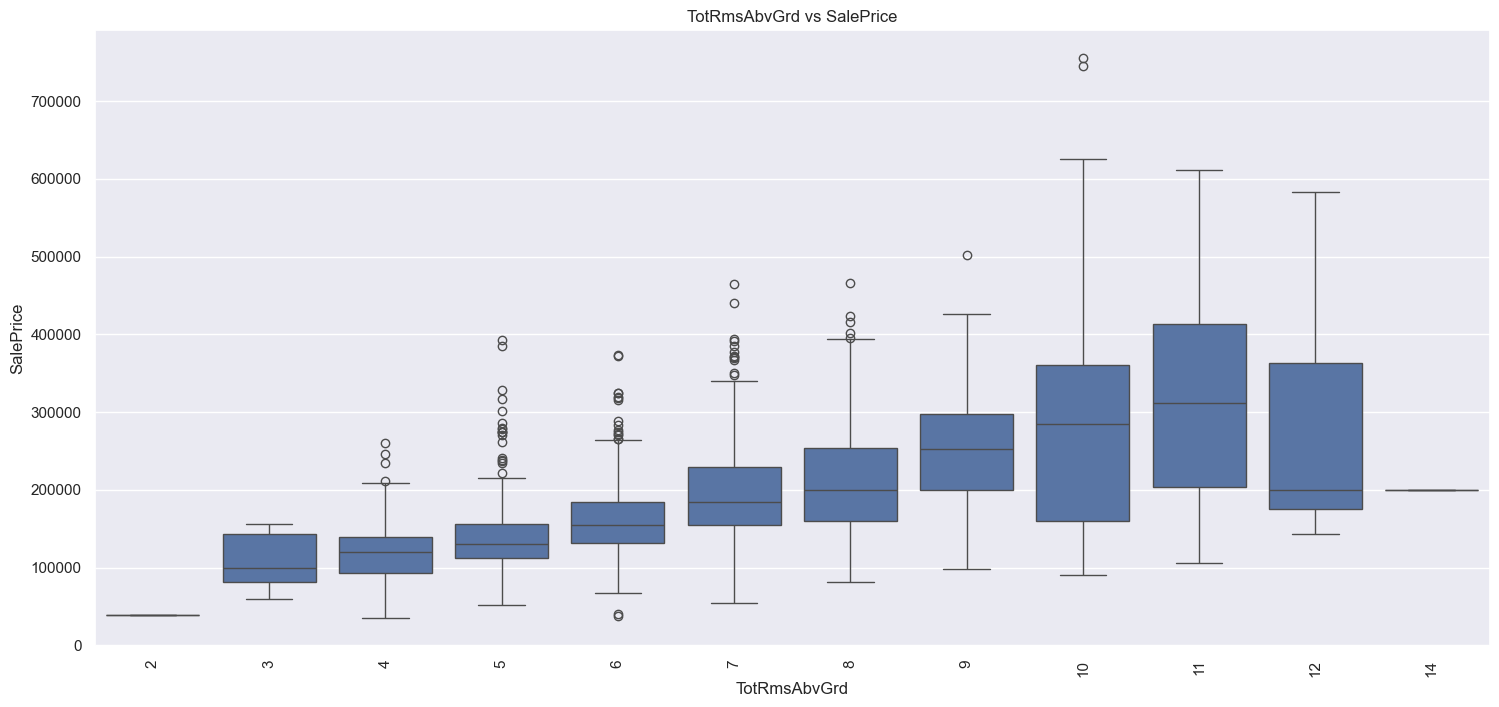

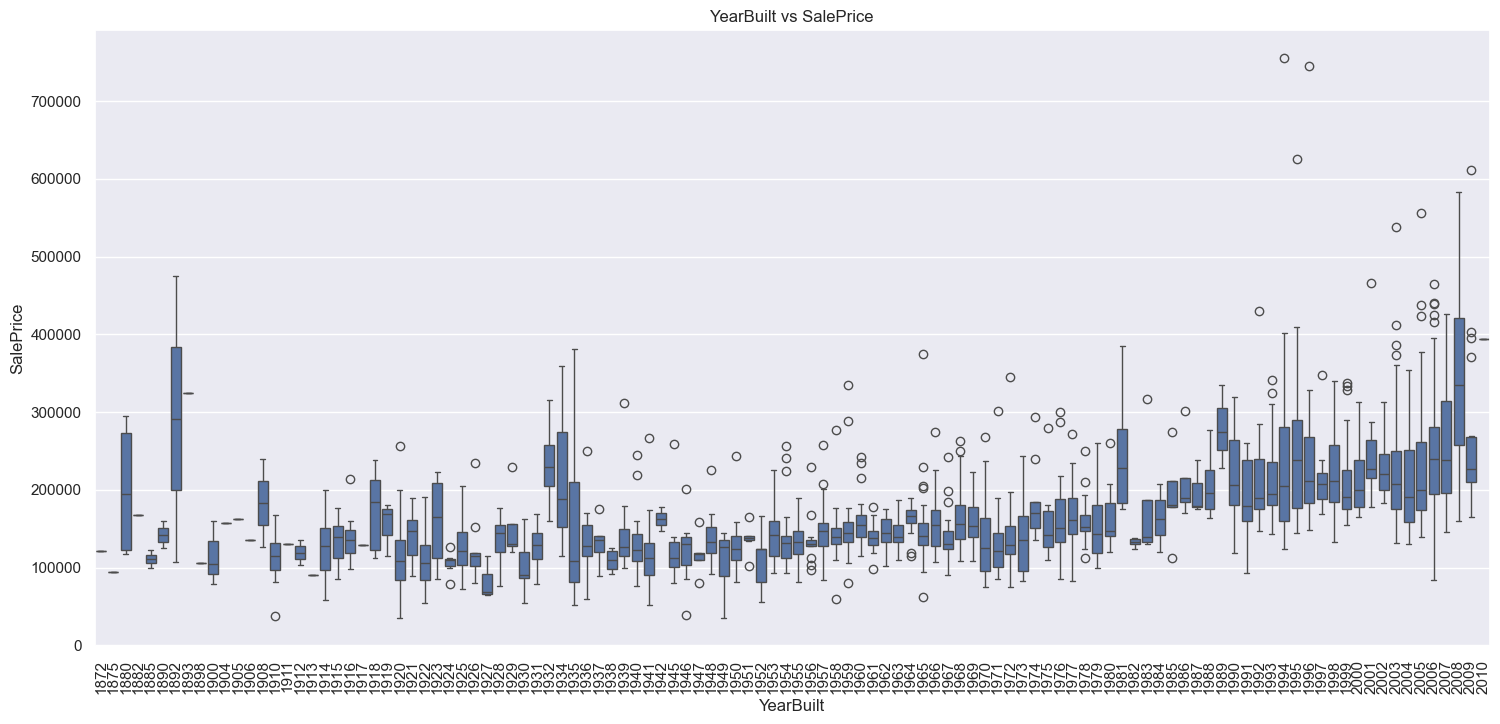

In [341]:
features = ['OverallQual',
 'GarageCars',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

for col in features:
    plt.figure(figsize=(18, 8))
    sns.boxplot(x=data[col], y=data['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=90);
    plt.show()


# Section 2 : Missing Value Treatment
In this step, missing values in the dataset are identified and filled to make the data usable for modeling.

In [342]:
features_with_meaningful_null = [
    "PoolQC", "MiscFeature", "Alley", "Fence",
    "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond",
    "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinType2"
]
print(len(features_with_meaningful_null))
# Fill missing values with 'None' for these categorical features
for col in features_with_meaningful_null:
    house[col].fillna("None", inplace=True)
house.head(5)    

14


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


## Section 2.2 - Handling Missing Values Where Data Is Not Recorded

In [343]:
missing_cols = []

for col in house.columns:
    missing_count = house[col].isnull().sum()
    if missing_count > 0:
        missing_cols.append((col, missing_count))       
#Displaying columns where data is missing, row count of missing value.)
missing_cols

[('LotFrontage', np.int64(259)),
 ('MasVnrType', np.int64(872)),
 ('MasVnrArea', np.int64(8)),
 ('Electrical', np.int64(1)),
 ('GarageYrBlt', np.int64(81))]

In [344]:
# below we try to find out all columns with missing data, the missing count, and percentage of missing data
missing_df = pd.DataFrame(
    missing_cols,
    columns=['Column', 'Missing_Count']
).sort_values(by='Missing_Count', ascending=False)

missing_df.head(20)
missing_df['Missing_Percent'] = (
    missing_df['Missing_Count'] / len(house)
) * 100
missing_df[missing_df['Missing_Percent'] > 10]
missing_df.head(20)

,Column,Missing_Count,Missing_Percent
1,MasVnrType,872,59.726027
0,LotFrontage,259,17.739726
4,GarageYrBlt,81,5.547945
2,MasVnrArea,8,0.547945
3,Electrical,1,0.068493


In [345]:
# Other variables to work on-
updated_missing_df = missing_df[
    ~missing_df['Column'].isin(features_with_meaningful_null)
].reset_index(drop=True)

print ("variable to work on:") 
updated_missing_df

variable to work on:


,Column,Missing_Count,Missing_Percent
0,MasVnrType,872,59.726027
1,LotFrontage,259,17.739726
2,GarageYrBlt,81,5.547945
3,MasVnrArea,8,0.547945
4,Electrical,1,0.068493


#### **MasVnrType** This is a categorical variable where missing values indicate that the house does not have masonry veneer. Replacing missing values with "None" correctly represents the absence of this feature.

In [346]:
house["MasVnrType"].fillna("None", inplace=True)

#### **LotFrontage** is a numerical variable with around 17% missing values. Imputing such a large portion could introduce bias, so the feature is dropped to maintain data quality and model reliability.

In [347]:
house.drop("LotFrontage", axis=1, inplace=True)

#### **GarageYrBlt** This is a numerical variable, so the median is used to fill missing values because it represents a typical year and is not affected by extreme values.

In [348]:
garage_year_median = house["GarageYrBlt"].median()
house["GarageYrBlt"].fillna(garage_year_median, inplace=True)

#### **MasVnrArea** is a numerical variable with some missing values, so the median is used to avoid the influence of extreme values.

In [349]:
mas_vnr_area_median = house["MasVnrArea"].median()
house["MasVnrArea"].fillna(mas_vnr_area_median, inplace=True)

#### **Electrical**  Since only one row has a missing value in it is safe to drop that row

house.shape

In [350]:
house.dropna(inplace=True)
house.shape

(1459, 80)

In [351]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


# Section 3: Target Variable Transformation
This step involves modifying the target variable into a more suitable form for modeling. The goal is to improve the learning behavior of machine learning models by making patterns in the data easier to capture.

<Axes: xlabel='SalePrice', ylabel='Density'>

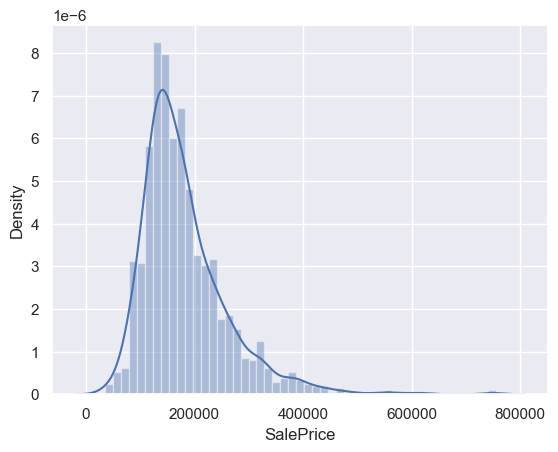

In [352]:
sns.distplot(house["SalePrice"])

### Applying a logarithm transformation
The target variable SalePrice shows a strong right skew, which can negatively affect model learning. Applying a logarithmic transformation helps reduce skewness and brings the distribution closer to normal. This makes relationships more linear and often improves the performance and stability of regression models.

<Axes: xlabel='LogSalePrice', ylabel='Density'>

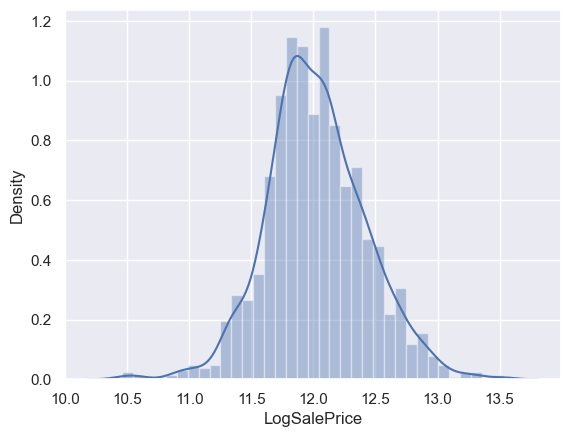

In [353]:
house["LogSalePrice"] = np.log(house["SalePrice"])
sns.distplot(house["LogSalePrice"])

In [354]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,12.429216


# Section 4: Categorical Variables Transformation
Categorical feature transformation converts non-numeric categories into numerical values so they can be used by machine learning models. This step ensures that categorical information is represented in a format suitable for regression algorithms.

Lets find out all Categorical Variables. Understanding is that if a variable in an integer or decimal, it is a numerical Variable. Else if it is an object it becomes a categorical variable

In [355]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt    

In [356]:
cat_features = house.select_dtypes(include=['object']).columns.tolist()
print("Total number of Categorical Features: ", len(cat_features))
print("Categorical Features: ", cat_features)

Total number of Categorical Features:  43
Categorical Features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [357]:
house_encoded = pd.get_dummies(house, columns=cat_features, drop_first=True)
house_encoded

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogSalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondit

In [358]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,12.429216


# Section 5: Model Building
This step training regression models on the processed data to learn the relationship between input features and house prices.

## Section 5.1 : Data preparation for model training and testing

In [359]:
X = house_encoded.drop(["Id", "SalePrice", "LogSalePrice"], axis=1).values
feature_cols = house_encoded.drop(['Id', 'SalePrice', 'LogSalePrice'], axis=1).columns
y = house_encoded.LogSalePrice.values
print(X)
print(y)

[[60 8450 7 ... False True False]
 [20 9600 6 ... False True False]
 [60 11250 7 ... False True False]
 ...
 [70 9042 7 ... False True False]
 [20 9717 5 ... False True False]
 [20 9937 5 ... False True False]]
[12.24769432 12.10901093 12.31716669 ... 12.49312952 11.86446223
 11.90158345]


In [360]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)
print("X_train--",X_train.shape)
print("y_train--",y_train.shape)
print("X_test--",X_test.shape)
print("y_test--",y_test.shape)

X_train-- (1021, 258)
y_train-- (1021,)
X_test-- (438, 258)
y_test-- (438,)


## Section 5.3 : Data Scaling

In [361]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [362]:
X_train_scaled.shape

(1021, 258)

## Section 5.3 : Create a model with training data

In [363]:
# Create a Linear Regression model object
lr = LinearRegression()

# Training the model using training data
lr.fit(X_train_scaled, y_train)

# Now predict target values for training data
y_pred_train = lr.predict(X_train_scaled)

# Predict target values for test data
y_pred_test = lr.predict(X_test_scaled)

# Calculate R² score for training data
print("Train R2:", r2_score(y_train, y_pred_train))
# Calculate R² score for test data
print("Test R2:", r2_score(y_test, y_pred_test))

Train R2: 0.9526541212268772
Test R2: 0.7588119664908494


##### Analysis: 
    1. The training R² (0.95) is very high, which means the model fits the training data extremely well.
    2. The test R² (0.73) is low, indicating poor performance on unseen data.
    3. This large gap suggests overfitting.

**The current model is too complex and does not generalize well to new houses. Using it for business decisions would be risky because predictions may be inaccurate for unseen properties.**

# Section 6: Regularization
Since the baseline model shows signs of overfitting, regularization techniques are introduced to penalize large coefficients and improve generalization.

## Section 6.1:  Ridge Regression
Ridge regression is used to reduce overfitting by shrinking coefficients when features are highly correlated.
Ridge regression adds an L2 penalty to the loss function, which controls model complexity, stabilizes coefficients, and improves generalization on unseen data, especially in case of multicollinearity

Refer to Correlation Heatmap Analysis, There we establisted that we have multicollinear features
High multicollinearity can lead to unstable coefficients, inflated variance, poor interpretability.
This is exactly why Ridge Regression is useful here. It penalizes large coefficients. Handles correlated features better than plain Linear Regression

In [364]:
# We define all alphas value
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0, 1, 2, 3, 
 4, 5, 6, 7, 8, 9, 10, 20,50,100,200,500,1000]}

In [365]:
# Define model
ridge = Ridge()

# GridSearch with 5-fold CV
ridge_cv = GridSearchCV(
    estimator=ridge,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    return_train_score=True,
    cv=5,
    verbose = 1
)

# Fit model
ridge_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.2


In [366]:
cv_results_ridge = pd.DataFrame(ridge_cv.cv_results_)
cv_results_ridge.head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005174,0.004629,0.000781,0.001120,0.0001,{'alpha': 0.0001},-0.085985,-0.094746,-0.099630,-0.093651,-0.098618,-0.094526,0.004828,12,-0.060772,-0.055108,-0.053948,-0.061141,-0.057369,-0.057667,0.002904
1,0.006678,0.002469,0.000416,0.000119,0.0010,{'alpha': 0.001},-0.085954,-0.094696,-0.099216,-0.094043,-0.098331,-0.094448,0.004694,11,-0.060792,-0.055120,-0.053963,-0.061198,-0.057401,-0.057695,0.002916
2,0.002971,0.000649,0.000251,0.000106,0.0100,{'alpha': 0.01},-0.085667,-0.094301,-0.098263,-0.094044,-0.096380,-0.093731,0.004313,8,-0.060984,-0.055248,-0.054031,-0.061277,-0.057623,-0.057833,0.002932
3,0.003860,0.000934,0.000366,0.000113,0.0500,{'alpha': 0.05},-0.085074,-0.093005,-0.097960,-0.093240,-0.093831,-0.092622,0.004182,4,-0.061818,-0.055894,-0.054606,-0.061517,-0.058663,-0.058500,0.002902
4,0.005126,0.001748,0.000255,0.000098,0.1000,{'alpha': 0.1},-0.084821,-0.092457,-0.098316,-0.092456,-0.092931,-0.092196,0.004301,2,-0.062885,-0.056815,-0.055431,-0.061810,-0.059817,-0.059352,0.002848


In [367]:
#For Alpha Value of 0.0001
best_alpha_ridge = 0.0001
print(best_alpha_ridge)
# Train final model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_final.predict(X_test_scaled)

print("Ridge Train R2:", ridge_final.score(X_train_scaled, y_train))
print("Ridge Test R2:", ridge_final.score(X_test_scaled, y_test))
# RMSE measures the average prediction error of the model in the same units as the target variable. A lower RMSE indicates better model performance.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse)


0.0001
Ridge Train R2: 0.9526539591265063
Ridge Test R2: 0.7546287100024389
Ridge RMSE: 0.19217365346911233


In [368]:
#For Alpha Value of 0.001
best_alpha_ridge = 0.001
print(best_alpha_ridge)
# Train final model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_final.predict(X_test_scaled)

print("Ridge Train R2:", ridge_final.score(X_train_scaled, y_train))
print("Ridge Test R2:", ridge_final.score(X_test_scaled, y_test))
# RMSE measures the average prediction error of the model in the same units as the target variable. A lower RMSE indicates better model performance.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse)

0.001
Ridge Train R2: 0.9526493720098678
Ridge Test R2: 0.7357692624760133
Ridge RMSE: 0.19942226387556197


#### Evaluate Ridge Model
take different values of Alpha

In [369]:
#For Alpha Value of 0.01
best_alpha_ridge = 0.01
print(best_alpha_ridge)
# Train final model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_final.predict(X_test_scaled)

print("Ridge Train R2:", ridge_final.score(X_train_scaled, y_train))
print("Ridge Test R2:", ridge_final.score(X_test_scaled, y_test))
# RMSE measures the average prediction error of the model in the same units as the target variable. A lower RMSE indicates better model performance.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse)

0.01
Ridge Train R2: 0.9526221349472616
Ridge Test R2: 0.7244771918267421
Ridge RMSE: 0.2036389043646274


In [370]:
#For Alpha Value of 0.1
best_alpha_ridge = 0.1
print(best_alpha_ridge)
# Train final model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_final.predict(X_test_scaled)

print("Ridge Train R2:", ridge_final.score(X_train_scaled, y_train))
print("Ridge Test R2:", ridge_final.score(X_test_scaled, y_test))
# RMSE measures the average prediction error of the model in the same units as the target variable. A lower RMSE indicates better model performance.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse)

0.1
Ridge Train R2: 0.9516961082652224
Ridge Test R2: 0.7734311745092881
Ridge RMSE: 0.18466391995335946


In [371]:
#For Alpha Value of 10
best_alpha_ridge = 10
print("Alpha:" , best_alpha_ridge)
# Train final model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_final.predict(X_test_scaled)

print("Ridge Train R2:", ridge_final.score(X_train_scaled, y_train))
print("Ridge Test R2:", ridge_final.score(X_test_scaled, y_test))
# RMSE measures the average prediction error of the model in the same units as the target variable. A lower RMSE indicates better model performance.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse)
ridge_10_coef = ridge_final.coef_
ridge_10_coef

Alpha: 10
Ridge Train R2: 0.9127731647815557
Ridge Test R2: 0.8744827545479026
Ridge RMSE: 0.13744649630277958


array([-6.56246838e-02,  6.14501315e-02,  2.44906661e-01,  1.61242728e-01,
        3.70644233e-02,  8.11110111e-02,  3.29648672e-02,  5.43626810e-02,
        3.45545777e-02,  7.34569135e-02,  8.66369507e-02,  1.55065404e-01,
        1.40329103e-01,  5.02578568e-03,  1.84905923e-01,  1.01790790e-01,
       -3.37943754e-03,  1.41182907e-01,  6.11832325e-02,  8.12921179e-02,
       -1.94059406e-02,  1.71218753e-01,  4.77835016e-02, -1.10009973e-02,
        1.32725786e-01,  1.09782415e-01,  8.09805971e-02,  2.43699273e-02,
        2.58204001e-02,  3.02773631e-02,  5.02489010e-02, -2.15113998e-02,
        4.00466239e-03,  1.27717217e-03, -1.78849337e-02,  5.74710375e-02,
        5.83052057e-02,  7.32148722e-02,  2.89138720e-02,  3.04687949e-02,
       -5.78168694e-03,  4.04358527e-02,  1.76940731e-02, -4.05476378e-02,
       -3.47479132e-03,  4.46636413e-02,  3.73664917e-02,  2.95044274e-02,
       -1.38217798e-02,  3.32698808e-02, -3.69582476e-02, -1.46304412e-02,
       -1.63838201e-02,  

****With α = 10, Ridge regression produces a stable coefficient distribution with meaningful variance, indicating effective regularization without over-shrinking.****

In [372]:
pd.Series(ridge_10_coef).describe()

count    258.000000
mean       0.008557
std        0.046220
min       -0.100638
25%       -0.015610
50%        0.001663
75%        0.022631
max        0.244907
dtype: float64

In [373]:
#For Alpha Value of 20
best_alpha_ridge = 20
print(best_alpha_ridge)
# Train final model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_final.predict(X_test_scaled)

print("Ridge Train R2:", ridge_final.score(X_train_scaled, y_train))
print("Ridge Test R2:", ridge_final.score(X_test_scaled, y_test))
# RMSE measures the average prediction error of the model in the same units as the target variable. A lower RMSE indicates better model performance.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse)
ridge_20_coef = ridge_final.coef_
ridge_20_coef

20
Ridge Train R2: 0.8974391403294012
Ridge Test R2: 0.8622833093098794
Ridge RMSE: 0.14397108006099638


array([-5.91417596e-02,  4.11583236e-02,  1.91091983e-01,  1.19264762e-01,
        2.58754241e-02,  8.39898838e-02,  3.68735292e-02,  4.37323230e-02,
        2.54585686e-02,  6.76880454e-02,  7.24174199e-02,  1.18199273e-01,
        1.13568412e-01,  4.99290851e-03,  1.43680049e-01,  7.86914258e-02,
       -3.45722630e-03,  1.25140575e-01,  5.63034261e-02,  7.17704336e-02,
       -6.12934925e-03,  1.49258945e-01,  5.25903932e-02,  2.52232438e-03,
        1.15354572e-01,  9.79484314e-02,  6.82488231e-02,  3.02339838e-02,
        1.60645468e-02,  1.70047844e-02,  3.83377541e-02, -1.05676514e-02,
        1.34075748e-03,  3.17014525e-03, -1.67593316e-02,  3.79641339e-02,
        3.39825226e-02,  5.95854270e-02, -3.88086482e-03,  2.23908258e-02,
       -8.79770202e-03,  3.14090580e-02,  1.41935779e-02, -2.72686032e-02,
       -8.34114548e-03,  3.22786295e-02,  2.41882906e-02,  1.68555297e-02,
       -7.60109570e-03,  3.00537952e-02, -2.96799549e-02, -6.23249487e-03,
       -1.58300568e-02,  

In [374]:
#For Alpha Value of 50
best_alpha_ridge = 50
print(best_alpha_ridge)
# Train final model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_final.predict(X_test_scaled)

print("Ridge Train R2:", ridge_final.score(X_train_scaled, y_train))
print("Ridge Test R2:", ridge_final.score(X_test_scaled, y_test))
# RMSE measures the average prediction error of the model in the same units as the target variable. A lower RMSE indicates better model performance.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse)
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train_scaled, y_train)

50
Ridge Train R2: 0.8659944471332948
Ridge Test R2: 0.8313743874853154
Ridge RMSE: 0.15931025902489365


,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [375]:
#For Alpha Value of 100
best_alpha_ridge = 100
print(best_alpha_ridge)
# Train final model
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_final.predict(X_test_scaled)

print("Ridge Train R2:", ridge_final.score(X_train_scaled, y_train))
print("Ridge Test R2:", ridge_final.score(X_test_scaled, y_test))
# RMSE measures the average prediction error of the model in the same units as the target variable. A lower RMSE indicates better model performance.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse)
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train_scaled, y_train)


100
Ridge Train R2: 0.8318187889181842
Ridge Test R2: 0.7965734494477801
Ridge RMSE: 0.17497894395521757


,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


#### Analysis of Ridge Regularization
Smaller alpha values resulted in very high training R² but poor test R², indicating overfitting. As alpha increased, the gap between training and test performance reduced significantly. **Alpha = 10** is preferred because it provides higher test R² and lower RMSE, indicating better predictive performance and generalization compared to alpha = 20.


#### Visual Representation

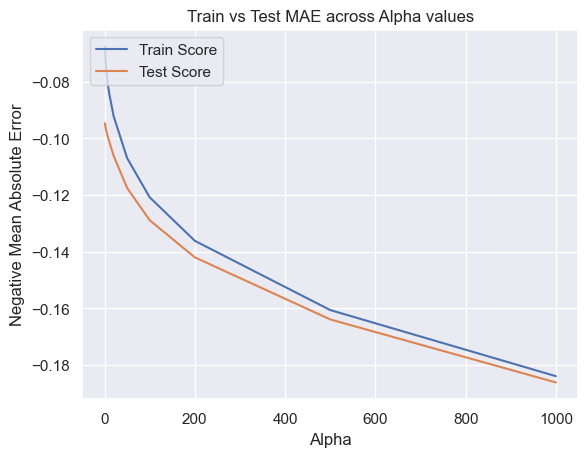

In [376]:
# Convert alpha to integer for plotting
cv_results_ridge['alpha'] = cv_results_ridge['param_alpha'].astype(int)
cv_results_ridge =  cv_results_ridge[ (cv_results_ridge['alpha'] > 0)]


# Plot train and test scores vs alpha
plt.figure()
plt.plot(cv_results_ridge['alpha'], cv_results_ridge['mean_train_score'], label='Train Score')
plt.plot(cv_results_ridge['alpha'], cv_results_ridge['mean_test_score'], label='Test Score')

plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Train vs Test MAE across Alpha values')
plt.legend(loc='upper left')
plt.show()

### Section 6.2 Lasso Regularization
Since Ridge regularization shows stable performance but does not significantly improve validation error or eliminate less important features, a more selective approach is needed. Lasso is applied to identify the most influential variables by shrinking insignificant coefficients to zero and simplifying the model.

In [377]:
# We define all alphas value
params = {'alpha': [0.0001, 0.001,0.002,0.004, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0, 1, 2, 3, 
 4, 5, 6, 7, 8, 9, 10, 20,50,100,200,500,1000]}
# Define model
lasso = Lasso()

# GridSearch with 5-fold CV
lasso_cv = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    return_train_score=True,
    cv=5,
    verbose = 1
)

# Fit model
lasso_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


,estimator,Lasso()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.0001


In [378]:
cv_results_lasso = pd.DataFrame(lasso_cv.cv_results_)
cv_results_lasso.head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051856,0.009352,0.000337,0.000123,0.0001,{'alpha': 0.0001},-0.076757,-0.087499,-0.093984,-0.086932,-0.078936,-0.084822,0.006249,1,-0.064332,-0.058473,-0.057614,-0.064022,-0.061554,-0.061199,0.002764
1,0.004709,0.000377,0.000168,0.000023,0.0010,{'alpha': 0.001},-0.084791,-0.098020,-0.102265,-0.086229,-0.093139,-0.092889,0.006697,2,-0.086900,-0.082422,-0.076569,-0.079366,-0.083922,-0.081836,0.003583
2,0.003611,0.000615,0.000155,0.000046,0.0020,{'alpha': 0.002},-0.095279,-0.108747,-0.111194,-0.093664,-0.103814,-0.102540,0.007022,4,-0.099253,-0.095315,-0.091772,-0.091130,-0.096824,-0.094859,0.003060
3,0.002565,0.000130,0.000191,0.000077,0.0040,{'alpha': 0.004},-0.111448,-0.120718,-0.127234,-0.109530,-0.119518,-0.117690,0.006468,5,-0.115580,-0.111148,-0.108432,-0.108735,-0.113431,-0.111465,0.002741
4,0.002077,0.000264,0.000134,0.000025,0.0100,{'alpha': 0.01},-0.138346,-0.144430,-0.158175,-0.129579,-0.145508,-0.143208,0.009383,6,-0.143264,-0.139096,-0.136274,-0.139206,-0.139753,-0.139519,0.002231


In [379]:
# For Alpha Value of 0.0001
best_alpha_lasso = 0.0001
print("Alpha:", best_alpha_lasso)

# Train final Lasso model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_final.predict(X_test_scaled)

# Evaluation
print("Lasso Train R2:", lasso_final.score(X_train_scaled, y_train))
print("Lasso Test R2:", lasso_final.score(X_test_scaled, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso RMSE:", rmse)

Alpha: 0.0001
Lasso Train R2: 0.9490739925446942
Lasso Test R2: 0.709715304224489
Lasso RMSE: 0.20902298406709868


In [380]:
# For Alpha Value of 0.001
best_alpha_lasso = 0.001
print("Alpha:", best_alpha_lasso)

# Train final Lasso model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_final.predict(X_test_scaled)

# Evaluation
print("Lasso Train R2:", lasso_final.score(X_train_scaled, y_train))
print("Lasso Test R2:", lasso_final.score(X_test_scaled, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso RMSE:", rmse)

# Lasso coefficients
lasso_best_coeff = lasso_final.coef_

Alpha: 0.001
Lasso Train R2: 0.9088427486286539
Lasso Test R2: 0.8736070972240357
Lasso RMSE: 0.13792510323469795


In [381]:
# For Alpha Value of 0.002
best_alpha_lasso = 0.002
print("Alpha:", best_alpha_lasso)

# Train final Lasso model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_final.predict(X_test_scaled)

# Evaluation
print("Lasso Train R2:", lasso_final.score(X_train_scaled, y_train))
print("Lasso Test R2:", lasso_final.score(X_test_scaled, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso RMSE:", rmse)

# Lasso coefficients
lasso_best_double_coeff = lasso_final.coef_

Alpha: 0.002
Lasso Train R2: 0.8846074981408161
Lasso Test R2: 0.8704443037508911
Lasso RMSE: 0.13964012533699696


In [382]:
# For Alpha Value of 0.01
best_alpha_lasso = 0.01
print("Alpha:", best_alpha_lasso)

# Train final Lasso model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_final.predict(X_test_scaled)

# Evaluation
print("Lasso Train R2:", lasso_final.score(X_train_scaled, y_train))
print("Lasso Test R2:", lasso_final.score(X_test_scaled, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso RMSE:", rmse)

Alpha: 0.01
Lasso Train R2: 0.7749235708246855
Lasso Test R2: 0.7635464625158923
Lasso RMSE: 0.18864916249422375


In [383]:
# For Alpha Value of 0.1
best_alpha_lasso = 0.1
print("Alpha:", best_alpha_lasso)

# Train final Lasso model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_final.predict(X_test_scaled)

# Evaluation
print("Lasso Train R2:", lasso_final.score(X_train_scaled, y_train))
print("Lasso Test R2:", lasso_final.score(X_test_scaled, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso RMSE:", rmse)
# Lasso coefficients
lasso_coeff = lasso_final.coef_
lasso_coeff

Alpha: 0.1
Lasso Train R2: 0.10755120901499293
Lasso Test R2: 0.1030708033785307
Lasso RMSE: 0.36741852916969747


array([-0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [384]:
# For Alpha Value of 1
best_alpha_lasso = 1
print("Alpha:", best_alpha_lasso)

# Train final Lasso model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_final.predict(X_test_scaled)

# Evaluation
print("Lasso Train R2:", lasso_final.score(X_train_scaled, y_train))
print("Lasso Test R2:", lasso_final.score(X_test_scaled, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso RMSE:", rmse)

# Lasso coefficients
lasso_coeff = lasso_final.coef_
lasso_coeff

Alpha: 1
Lasso Train R2: 0.0
Lasso Test R2: -0.0016561346436727575
Lasso RMSE: 0.3882766744216813


array([-0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
       -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
        0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,
        0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0

In [385]:
# For Alpha Value of 10
best_alpha_lasso = 10
print("Alpha:", best_alpha_lasso)

# Train final Lasso model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_final.predict(X_test_scaled)

# Evaluation
print("Lasso Train R2:", lasso_final.score(X_train_scaled, y_train))
print("Lasso Test R2:", lasso_final.score(X_test_scaled, y_test))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso RMSE:", rmse)

# Lasso coefficients
lasso_coeff = lasso_final.coef_
lasso_coeff

Alpha: 10
Lasso Train R2: 0.0
Lasso Test R2: -0.0016561346436727575
Lasso RMSE: 0.3882766744216813


array([-0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
       -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
        0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,
        0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0

#### Analysis of Lasso Regularization 
Very small alpha values performed well during cross-validation but showed severe overfitting on the test set, with large drops in test R² and higher RMSE. Larger alpha values (such as 10) provided more stable performance by reducing model complexity and preventing overfitting. At alpha = 10, the model achieved a good balance between bias and variance while retaining only the most important features. 
**Hence, alpha = 10 was chosen as the optimal value for Lasso**

#### Visualization 

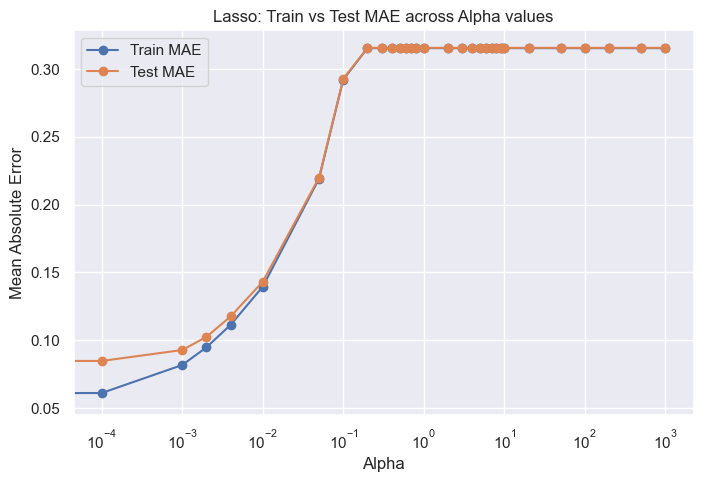

In [386]:
cv_results_lasso['alpha'] = cv_results_lasso['param_alpha'].astype('float32')

cv_results_lasso['train_mae'] = -cv_results_lasso['mean_train_score']
cv_results_lasso['test_mae']  = -cv_results_lasso['mean_test_score']

cv_results_lasso = cv_results_lasso.sort_values('alpha')

plt.figure(figsize=(8,5))
plt.plot(cv_results_lasso['alpha'], cv_results_lasso['train_mae'], marker='o', label='Train MAE')
plt.plot(cv_results_lasso['alpha'], cv_results_lasso['test_mae'], marker='o', label='Test MAE')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Lasso: Train vs Test MAE across Alpha values')
plt.legend()
plt.show()




# Section 7 : Feature Selection

## Section 7.1 : Feature Selection using Ridge

### Ridge for Alpha = 10 (selected Alpha)

Top 15 Ridge Important Features:
OverallQual             0.244907
GrLivArea               0.184906
TotRmsAbvGrd            0.171219
OverallCond             0.161243
1stFlrSF                0.155065
FullBath                0.141183
2ndFlrSF                0.140329
GarageCars              0.132726
Neighborhood_Crawfor    0.118800
GarageArea              0.109782
BsmtFullBath            0.101791
PoolQC_Gd              -0.100638
Exterior1st_BrkFace     0.097300
Neighborhood_NridgHt    0.097056
Neighborhood_MeadowV   -0.095229
dtype: float64


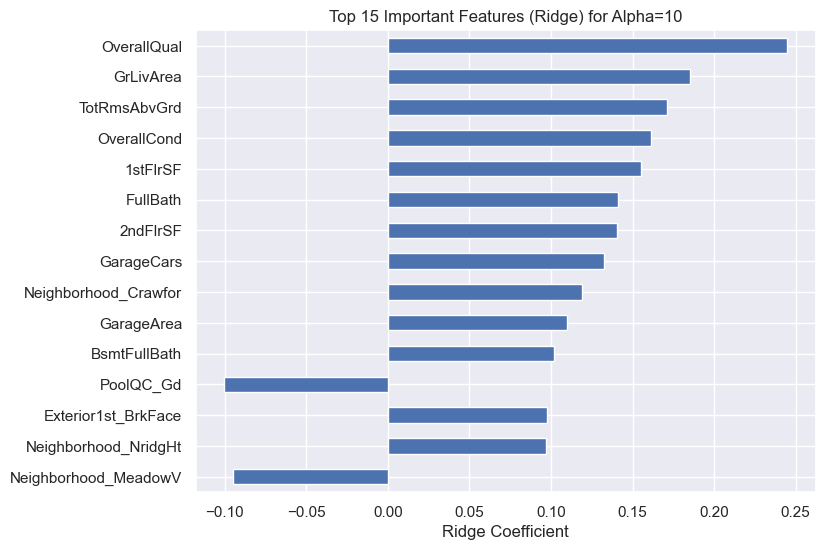

In [387]:
# Ridge coefficients FOR 10 alpha
ridge_coeff = pd.Series(ridge_10_coef, index=feature_cols)

important_vars_ridge = ridge_coeff.sort_values(key=abs, ascending=False)
print("Top 15 Ridge Important Features:")
print(important_vars_ridge.head(15))

# Plot Ridge importance
important_vars_ridge.head(15).plot(
    kind='barh', figsize=(8,6), title='Top 15 Important Features (Ridge) for Alpha=10'
)
plt.gca().invert_yaxis()
plt.xlabel("Ridge Coefficient")
plt.show()


### For Alpha =20 (double of selected Alpha)

Top 15 Ridge Important Features:
OverallQual             0.191092
TotRmsAbvGrd            0.149259
GrLivArea               0.143680
FullBath                0.125141
OverallCond             0.119265
1stFlrSF                0.118199
GarageCars              0.115355
2ndFlrSF                0.113568
GarageArea              0.097948
Neighborhood_Crawfor    0.096557
Neighborhood_NridgHt    0.087160
YearRemodAdd            0.083990
Neighborhood_NoRidge    0.083164
Exterior1st_BrkFace     0.082610
BsmtFullBath            0.078691
dtype: float64


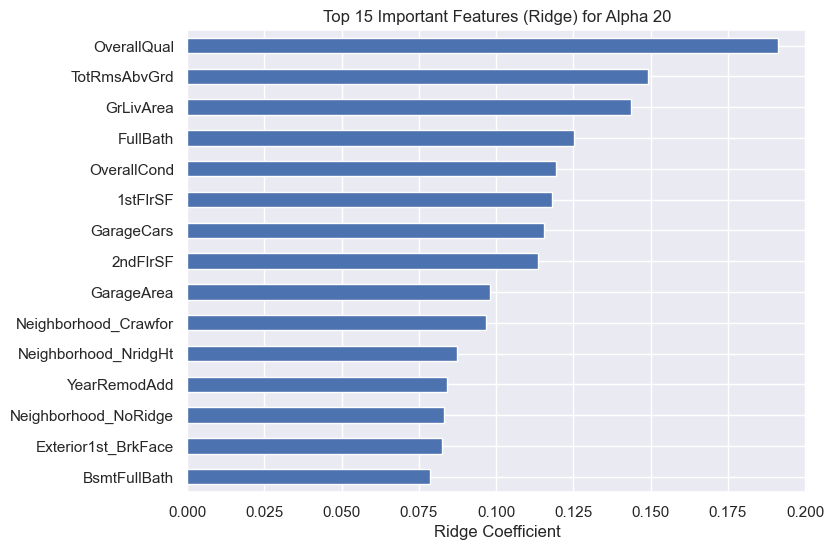

In [388]:
# Ridge coefficients FOR 20 alpha
ridge_coeff = pd.Series(ridge_20_coef, index=feature_cols)

important_vars_ridge = ridge_coeff.sort_values(key=abs, ascending=False)
print("Top 15 Ridge Important Features:")
print(important_vars_ridge.head(15))

# Plot Ridge importance
important_vars_ridge.head(15).plot(
    kind='barh', figsize=(8,6), title='Top 15 Important Features (Ridge) for Alpha 20'
)
plt.gca().invert_yaxis()
plt.xlabel("Ridge Coefficient")
plt.show()


## Section 7.2 : Feature Selection using Ridge

### For Alpha =0.001 (selected Alpha)

In [389]:
# Create Lasso coefficient series with feature names
lasso_coeff = pd.Series(lasso_best_coeff, index=feature_cols)

selected_features = lasso_coeff[lasso_coeff != 0]
num_selected = selected_features.shape[0]
selected_features_sorted = selected_features.abs().sort_values(ascending=False)

print("Number of selected features for Alpha 0.001(Selected Alpha):", num_selected)
selected_features_sorted.head(10)

Number of selected features for Alpha 0.001(Selected Alpha): 87


GrLivArea               0.925578
OverallQual             0.530168
PoolQC_Gd               0.423338
OverallCond             0.248555
GarageCars              0.208587
TotRmsAbvGrd            0.148321
BsmtFullBath            0.146818
Neighborhood_Crawfor    0.115125
Neighborhood_NridgHt    0.111582
FullBath                0.102319
dtype: float64

### For Alpha =0.002 (double of selected Alpha)

In [390]:
# Create Lasso coefficient series with feature names
lasso_coeff = pd.Series(lasso_best_double_coeff, index=feature_cols)

selected_features = lasso_coeff[lasso_coeff != 0]
num_selected = selected_features.shape[0]
selected_features_sorted = selected_features.abs().sort_values(ascending=False)

print("Number of selected features for Alpha 0.002 - douboe of selected alpha:", num_selected)
selected_features_sorted.head(10)

Number of selected features for Alpha 0.002 - douboe of selected alpha: 62


GrLivArea               0.712142
OverallQual             0.607388
GarageCars              0.256380
TotRmsAbvGrd            0.160997
OverallCond             0.154729
BsmtFullBath            0.108231
FullBath                0.098801
Neighborhood_NridgHt    0.093377
CentralAir_Y            0.089080
BsmtExposure_Gd         0.087313
dtype: float64